## Using SVD for Image Compression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for reading and showing images
from skimage import img_as_float # for formatting image matrices correctly, Anaconda name: scikit-image
from skimage.color import rgb2gray # converting from RGB to grayscale
from ipywidgets import interact # making an interactive widget (Ignore this, it's not required for current understanding), Anaconda name: ipywidgets

#### Compress Grayscale Images first:

In [4]:
# First, let's define a function to take the top k singular values and use those to reconstruct the original matrix

def svd_compress(A, k):
    U, S, VT = np.linalg.svd(A)
    reconst_A = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :])) # The actual compression step. U: (m,k), S: (k,k), VT: (k,n)
    
    print("Shape of U:", U[:, :k].shape)
    print("Shape of S:", np.diag(S[:k]).shape)
    print("Shape of VT:", VT[:k, :].shape)
    
    return reconst_A

In [5]:
# Now let's define an actual function to compress grayscale images

def compress_gray_images(img_path, k):
    img = mpimg.imread(img_path) # read an image as a numpy array
    image = rgb2gray(img) # convert this image to grayscale
    
    original_shape = image.shape # an array, basically (m,n)
    
    print("Original Size:", original_shape)
    reconst_image = svd_compress(image, k)
    
    compression_ratio = (k * (original_shape[0] + original_shape[1] + k)) / (original_shape[0] * original_shape[1]) * 100
    # (shape of U + shape of VT + shape of S) / shape of original matrix
    
    fig, ax = plt.subplots(1, 1, figsize = (10,8))
    ax.set_title("Compression Ratio = {:.2f}".format(compression_ratio) + "%")
    ax.imshow(reconst_image, cmap = "gray")
    ax.axis("off")

<ipython-input-6-8ece592313b7>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(img)
<ipython-input-5-933d3acf3e35>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(img) # convert this image to grayscale


Original Size: (1204, 1880)
Shape of U: (1204, 30)
Shape of S: (30, 30)
Shape of VT: (30, 1880)


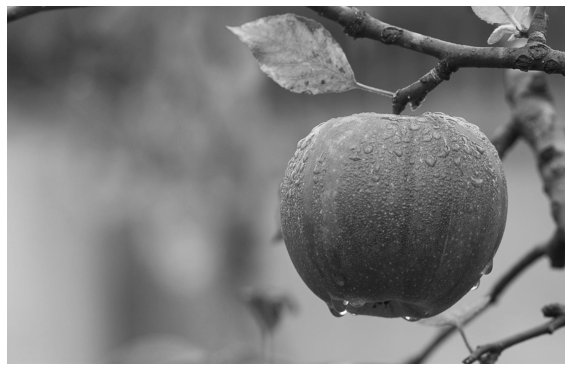

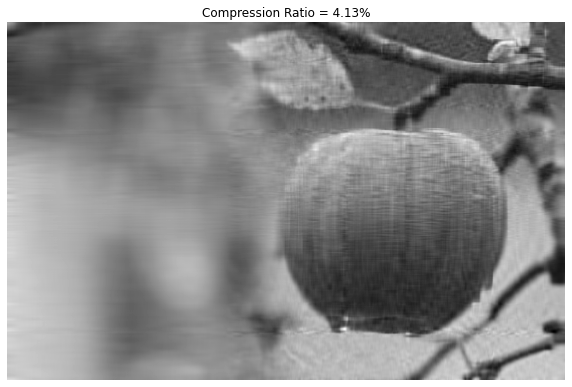

In [6]:
img_path = "fruit.jpeg"
img = mpimg.imread(img_path)
image = rgb2gray(img)

fig, ax = plt.subplots(1,1, figsize = (10,8))
ax.imshow(image, cmap = "gray")
ax.axis("off")

compressed_image = compress_gray_images(img_path, 30)

In [10]:
interact(compress_gray_images, img_path = ["bird.png", "fruit.jpeg", "woman.jpg", "cat.jpeg", "landscape.jpg", "coffee.jpg"], k = (1,500)) # interactive!

interactive(children=(Dropdown(description='img_path', options=('bird.png', 'fruit.jpeg', 'woman.jpg', 'cat.jp…

<function __main__.compress_gray_images(img_path, k)>

#### Compressing RGB Images

In [11]:
def compress_rgb_images(img_path, k):
    image = mpimg.imread(img_path) # read an image
    image = img_as_float(image) # format this image as float values, it'll help later to display correctly
    original_shape = image.shape # array, values (m, n, 3)
    
    img_reshaped = image.reshape(original_shape[0], original_shape[1]*3) # incorporate the 3 "channels" into the 2nd axis
    
    print("Original Size:", original_shape)
    print("Reshaped Size:", img_reshaped.shape)
    
    reconst_image = svd_compress(img_reshaped, k)
    
    reconst_image = reconst_image.reshape(original_shape) # revert back to the original shape with 3 channels, RGB
    print(reconst_image.shape)
    
    compression_ratio = (k * (original_shape[0] + original_shape[1] + k)) / (original_shape[0] * original_shape[1] * 3) * 100
    # (shape of U + shape of VT + shape of S) / shape of original matrix
    
    fig, ax = plt.subplots(1, 1, figsize = (10,8))
    ax.set_title("Compression Ratio = {:.2f}".format(compression_ratio) + "%")
    ax.imshow(reconst_image)
    ax.axis("off")

Original Size: (533, 800, 3)
Reshaped Size: (533, 2400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of U: (533, 200)
Shape of S: (200, 200)
Shape of VT: (200, 2400)
(533, 800, 3)


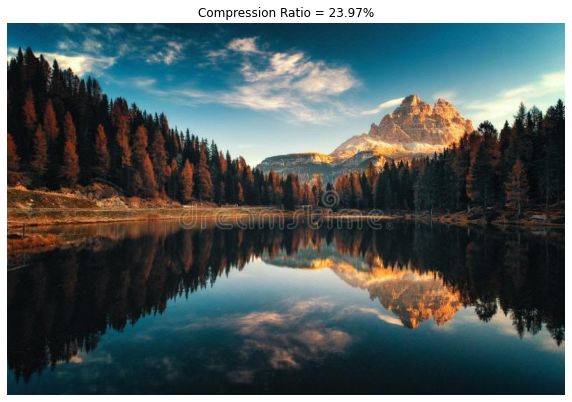

In [12]:
img_path = "landscape.jpg"
compressed_image = compress_rgb_images(img_path, 200)

In [13]:
interact(compress_rgb_images, img_path = ["cat.jpeg", "landscape.jpg", "coffee.jpg"], k = (1,395)) # interactive!

interactive(children=(Dropdown(description='img_path', options=('cat.jpeg', 'landscape.jpg', 'coffee.jpg'), va…

<function __main__.compress_rgb_images(img_path, k)>